In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout,Input
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# # genrators
# train_data = keras.utils.image_dataset_from_directory(
# directory='drowsiness data/train/',
# labels='inferred',
# label_mode='int',
# batch_size=10,
# image_size=(90,90)
# )

# test_data = keras.utils.image_dataset_from_directory(
# directory='drowsiness data/test/',
# labels='inferred',
# label_mode='int',
# batch_size=10,
# image_size=(90,90)
# )

Found 20551 files belonging to 2 classes.
Found 3129 files belonging to 2 classes.


In [3]:
# #Normalize  pixel values between 0 to 1
# def process(image,lable):
#     image = tf.cast(image/255.,tf.float32)
#     return image,lable

# train_ds = train_data.map(process)
# test_data=test_data.map(process)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,
                               height_shift_range=0.2,validation_split=0.2)

batch_size = 8

train_genrator = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

validation_genrator = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='validation')

test_datagen =ImageDataGenerator(rescale=1./255)
test_genrator=test_datagen.flow_from_directory('drowsiness data/test',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

Found 16442 images belonging to 2 classes.
Found 4109 images belonging to 2 classes.


In [6]:
# create CNN model

model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model.add(Dropout(0.5))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model.add(Dropout(0.5))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [7]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# from keras.callbacks import EarlyStopping
# earlystopping = EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=False)

# history = model.fit(train_genrator,epochs=10,validation_data=validation_genrator,callbacks=earlystopping)

Epoch 1/10
1645/1645 [==============================] - 406s 245ms/step - loss: 0.5954 - accuracy: 0.6610 - val_loss: 2.2344 - val_accuracy: 0.6629
Epoch 2/10
1645/1645 [==============================] - 429s 261ms/step - loss: 0.4900 - accuracy: 0.7685 - val_loss: 2.9545 - val_accuracy: 0.7420
Epoch 3/10
1645/1645 [==============================] - 322s 196ms/step - loss: 0.4298 - accuracy: 0.8023 - val_loss: 6.0014 - val_accuracy: 0.7265
Epoch 4/10
1645/1645 [==============================] - 334s 203ms/step - loss: 0.3825 - accuracy: 0.8279 - val_loss: 1.8538 - val_accuracy: 0.7576
Epoch 5/10
1645/1645 [==============================] - 296s 180ms/step - loss: 0.3438 - accuracy: 0.8514 - val_loss: 1.4812 - val_accuracy: 0.7763
Epoch 6/10
1645/1645 [==============================] - 300s 182ms/step - loss: 0.3156 - accuracy: 0.8672 - val_loss: 4.7715 - val_accuracy: 0.7941
Epoch 7/10
1645/1645 [==============================] - 294s 178ms/step - loss: 0.2785 - accuracy: 0.8866 - val_

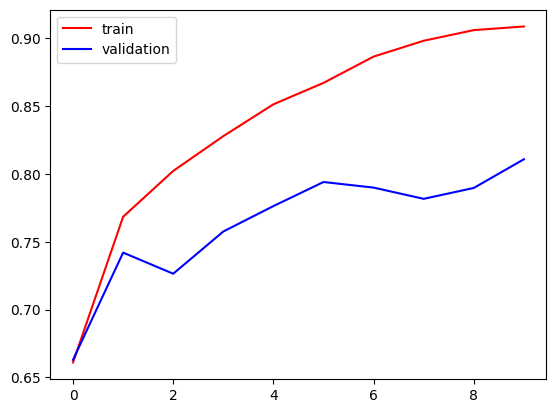

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

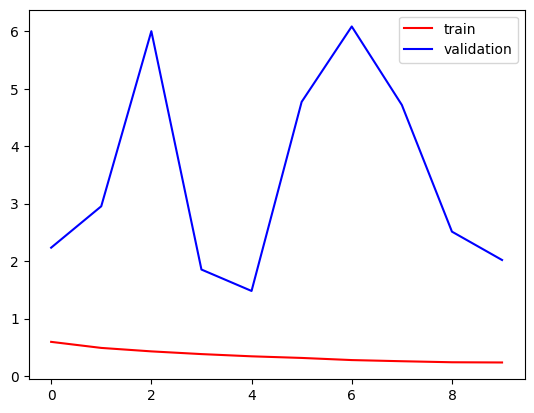

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
pred=model.predict(test_genrator)
opn=[]
closen= []
for p in pred:
    if p[0]>=0.5:
        opn.append(1)
    else:
        closen.append(0)
        
print(len(opn))
print(len(closen))

313/313 [==============================] - 95s 298ms/step
1344
1785


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,
                               height_shift_range=0.2,validation_split=0.2)

batch_size = 10

train_genrator = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

validation_genrator = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='validation')

test_datagen =ImageDataGenerator(rescale=1./255)
test_genrator=test_datagen.flow_from_directory('drowsiness data/test',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

Found 16442 images belonging to 2 classes.
Found 4109 images belonging to 2 classes.
Found 3129 images belonging to 2 classes.


In [19]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model.add(Dropout(0.5))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 78, 78, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 39, 39, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 18, 18, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 40)       

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# from keras.callbacks import EarlyStopping
# earlystopping = EarlyStopping(monitor='val_loss',patience=,verbose=1,restore_best_weights=False)

history = model.fit(train_genrator,epochs=5,validation_data=validation_genrator)

Epoch 1/5
1645/1645 [==============================] - 295s 178ms/step - loss: 0.6528 - accuracy: 0.5759 - val_loss: 1.6378 - val_accuracy: 0.6023
Epoch 2/5
1645/1645 [==============================] - 171s 104ms/step - loss: 0.6309 - accuracy: 0.5941 - val_loss: 0.8790 - val_accuracy: 0.5795
Epoch 3/5
1645/1645 [==============================] - 80s 48ms/step - loss: 0.6258 - accuracy: 0.6079 - val_loss: 1.3690 - val_accuracy: 0.6315
Epoch 4/5
1645/1645 [==============================] - 79s 48ms/step - loss: 0.5877 - accuracy: 0.6722 - val_loss: 1.2705 - val_accuracy: 0.6863
Epoch 5/5
1645/1645 [==============================] - 81s 49ms/step - loss: 0.5256 - accuracy: 0.7390 - val_loss: 1.8507 - val_accuracy: 0.6982


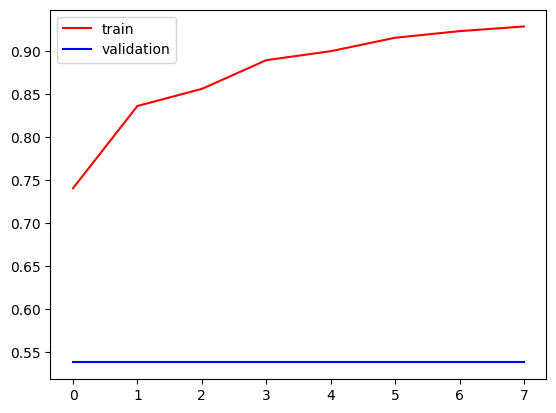

In [10]:
# plt.plot(history.history['accuracy'],color='red',label='train')
# plt.plot(history.history['val_accuracy'],color='blue',label='validation')
# plt.legend()
# plt.show()

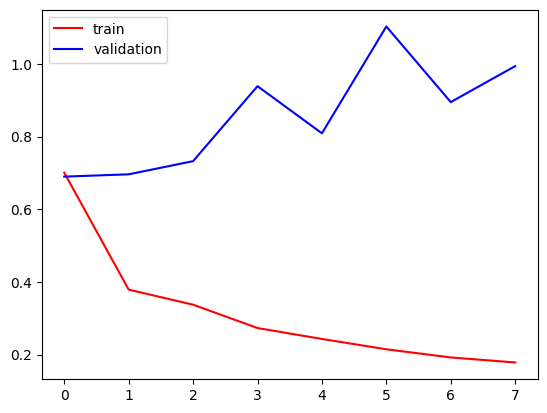

In [11]:
# plt.plot(history.history['loss'],color='red',label='train')
# plt.plot(history.history['val_loss'],color='blue',label='validation')
# plt.legend()
# plt.show()

In [12]:
# model=Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(90,90,3)))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# # model.add(Dropout(0.5))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# # model.add(Dropout(0.5))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# # model.add(Dropout(0.5))

# model.add(Flatten())

# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 88, 88, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 19, 19, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 9, 9, 64)        

In [13]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# from keras.callbacks import EarlyStopping
# earlystopping = EarlyStopping(monitor='val_loss',patience=7,verbose=1,restore_best_weights=False)

# history = model.fit(train_data,epochs=10,validation_data=test_data,callbacks=earlystopping)

Epoch 1/10
2056/2056 [==============================] - 201s 96ms/step - loss: 0.7088 - accuracy: 0.5830 - val_loss: 0.6905 - val_accuracy: 0.5395
Epoch 2/10
2056/2056 [==============================] - 195s 95ms/step - loss: 0.6552 - accuracy: 0.5810 - val_loss: 0.6902 - val_accuracy: 0.5382
Epoch 3/10
2056/2056 [==============================] - 186s 90ms/step - loss: 0.6934 - accuracy: 0.4994 - val_loss: 0.6917 - val_accuracy: 0.5382
Epoch 4/10
2056/2056 [==============================] - 180s 88ms/step - loss: 0.6912 - accuracy: 0.5279 - val_loss: 0.6896 - val_accuracy: 0.5411
Epoch 5/10
2056/2056 [==============================] - 179s 87ms/step - loss: 0.6471 - accuracy: 0.5694 - val_loss: 0.6820 - val_accuracy: 0.5702
Epoch 6/10
2056/2056 [==============================] - 179s 87ms/step - loss: 0.6475 - accuracy: 0.5786 - val_loss: 0.6907 - val_accuracy: 0.5382
Epoch 7/10
2056/2056 [==============================] - 180s 88ms/step - loss: 0.6482 - accuracy: 0.5671 - val_loss: 0

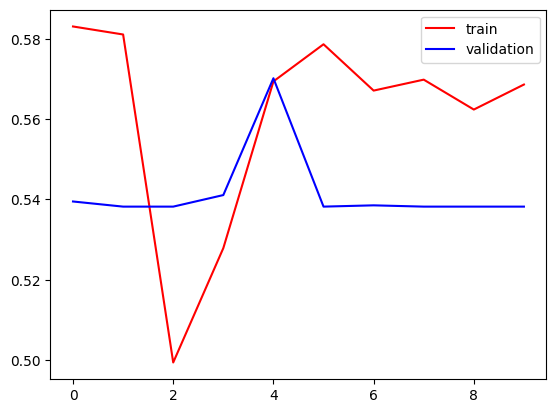

In [14]:
# plt.plot(history.history['accuracy'],color='red',label='train')
# plt.plot(history.history['val_accuracy'],color='blue',label='validation')
# plt.legend()
# plt.show()

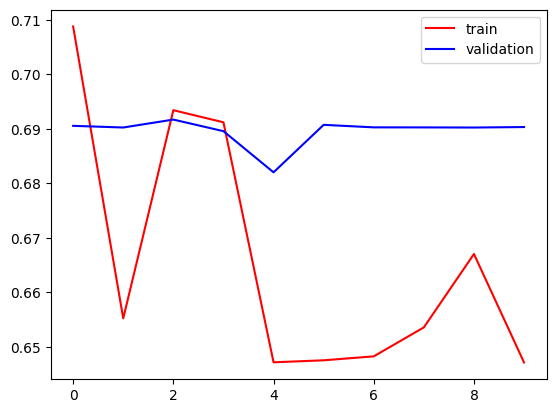

In [15]:
# plt.plot(history.history['loss'],color='red',label='train')
# plt.plot(history.history['val_loss'],color='blue',label='validation')
# plt.legend()
# plt.show()

In [16]:
# model=Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(90,90,3)))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model.add(Dropout(0.5))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model.add(Dropout(0.5))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# model.add(Dropout(0.5))

# model.add(Flatten())

# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='sigmoid'))

# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 88, 88, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 44, 44, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 44, 44, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 42, 42, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 21, 21, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 21, 21, 64)       

In [17]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# from keras.callbacks import EarlyStopping
# earlystopping = EarlyStopping(monitor='val_loss',patience=7,verbose=1,restore_best_weights=False)

# history = model.fit(train_data,epochs=10,validation_data=test_data,callbacks=earlystopping)

Epoch 1/10
2056/2056 [==============================] - 212s 102ms/step - loss: 1.0877 - accuracy: 0.6212 - val_loss: 0.7185 - val_accuracy: 0.5382
Epoch 2/10
2056/2056 [==============================] - 210s 102ms/step - loss: 0.5558 - accuracy: 0.7334 - val_loss: 0.7306 - val_accuracy: 0.5382
Epoch 3/10
2056/2056 [==============================] - 203s 99ms/step - loss: 0.6497 - accuracy: 0.5804 - val_loss: 0.7120 - val_accuracy: 0.5382
Epoch 4/10
2056/2056 [==============================] - 203s 99ms/step - loss: 0.5245 - accuracy: 0.7655 - val_loss: 0.7133 - val_accuracy: 0.5382
Epoch 5/10
2056/2056 [==============================] - 202s 98ms/step - loss: 0.4554 - accuracy: 0.8053 - val_loss: 0.7681 - val_accuracy: 0.5382
Epoch 6/10
2056/2056 [==============================] - 202s 98ms/step - loss: 0.4018 - accuracy: 0.8447 - val_loss: 0.7369 - val_accuracy: 0.5382
Epoch 7/10
2056/2056 [==============================] - 203s 98ms/step - loss: 0.3692 - accuracy: 0.8587 - val_loss:

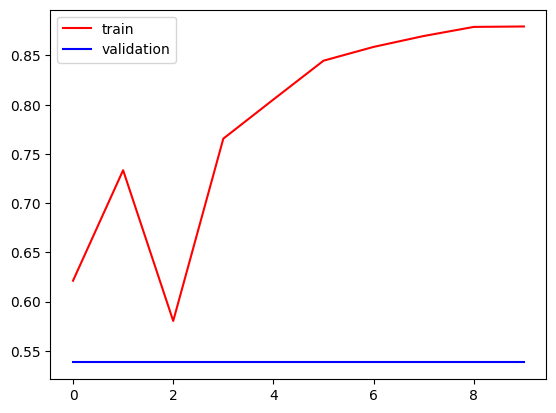

In [18]:
# plt.plot(history.history['accuracy'],color='red',label='train')
# plt.plot(history.history['val_accuracy'],color='blue',label='validation')
# plt.legend()
# plt.show()

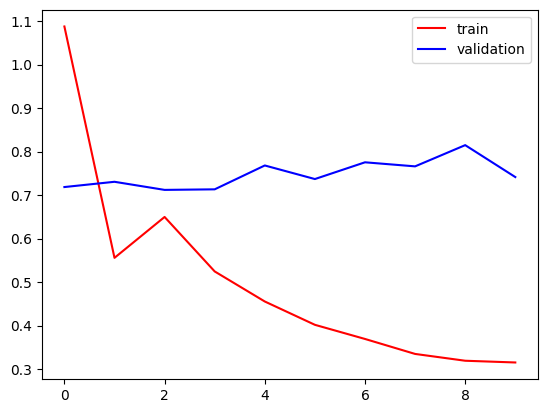

In [19]:
# plt.plot(history.history['loss'],color='red',label='train')
# plt.plot(history.history['val_loss'],color='blue',label='validation')
# plt.legend()
# plt.show()

In [23]:
# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,
#                                height_shift_range=0.2,validation_split=0.2)

# batch_size = 8

# train_genrator = train_datagen.flow_from_directory('drowsiness data/train',target_size=(90,90),batch_size=batch_size,
#                                                class_mode='binary',subset='training')

# validation_genrator = train_datagen.flow_from_directory('drowsiness data/train',target_size=(90,90),batch_size=batch_size,
#                                                class_mode='binary',subset='validation')

# test_datagen =ImageDataGenerator(rescale=1./255)
# test_data=test_datagen.flow_from_directory('drowsiness data/test',target_size=(90,90),batch_size=batch_size,
#                                                class_mode='binary',subset='training')

Found 16442 images belonging to 2 classes.
Found 4109 images belonging to 2 classes.
Found 3129 images belonging to 2 classes.


In [24]:
# earlystopping = EarlyStopping(monitor='val_loss',patience=7,verbose=1,restore_best_weights=False)
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# history = model.fit(train_genrator,epochs=10,validation_data=validation_genrator,callbacks=earlystopping)

Epoch 1/10
2056/2056 [==============================] - 480s 232ms/step - loss: 0.5805 - accuracy: 0.6848 - val_loss: 1.0686 - val_accuracy: 0.6491
Epoch 2/10
2056/2056 [==============================] - 347s 169ms/step - loss: 0.5048 - accuracy: 0.7497 - val_loss: 1.4024 - val_accuracy: 0.6663
Epoch 3/10
2056/2056 [==============================] - 310s 151ms/step - loss: 0.4630 - accuracy: 0.7763 - val_loss: 2.4319 - val_accuracy: 0.6033
Epoch 4/10
2056/2056 [==============================] - 311s 151ms/step - loss: 0.4389 - accuracy: 0.7941 - val_loss: 3.4823 - val_accuracy: 0.6306
Epoch 5/10
2056/2056 [==============================] - 354s 172ms/step - loss: 0.4144 - accuracy: 0.8107 - val_loss: 4.4756 - val_accuracy: 0.6238
Epoch 6/10
2056/2056 [==============================] - 536s 261ms/step - loss: 0.3954 - accuracy: 0.8180 - val_loss: 4.8222 - val_accuracy: 0.6289
Epoch 7/10
2056/2056 [==============================] - 332s 161ms/step - loss: 0.3782 - accuracy: 0.8341 - val_

In [26]:
pred=model.predict(test_data)

392/392 [==============================] - 23s 56ms/step
